# Clustering Analysis of a Customer Segmentation Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import sys

 
import warnings
warnings.filterwarnings('ignore')

## LOADING THE DATASET

In [3]:
# #Loading the dataset
df = pd.read_csv("./marketing_campaign.csv" , sep = "\t")

print("Number of datapoints: ", len(df))
df.head()

Number of datapoints:  2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## DATA PREPROCESSING
* To get the information of the dataset like checking the null values, count of values, etc. we will use .info() method.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


* To check the null values in the dataset.

In [6]:
for col in df.columns:
    temp = df[col].isnull().sum()
    if temp > 0:
        print(f'Column {col} contains {temp} null values.')

Column Income contains 24 null values.


* Only income column has some missing values.
* Now, once we have the count of the null values and we know the values are very less we can drop them (it will not affect the dataset much).

In [7]:
df = df.dropna()
print("Total missing values are:", len(df))

Total missing values are: 2216


* To find the total number of unique values in each column we can use data.unique() method. 

In [8]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

* Here we can observe that there are columns which contain single values in the whole column so, they have no relevance in the model development.
* Dt_Customer is an object which suppose to be date and we can convert into 3 columns i.e. day, month, year.

In [9]:
parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')

* Now we have all the important features, we can now drop features like Z_CostContact, Z_Revenue, Dt_Customer.

In [10]:
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],
        axis=1,
        inplace=True)

In [11]:

floats, objects = [], []
for col in df.columns:
    if df[col].dtype == object:
        objects.append(col)
    elif df[col].dtype == float:
        floats.append(col)
 
print("Categorical variables in the dataset ", objects)
print("Float: ", floats)

Categorical variables in the dataset  ['Education', 'Marital_Status']
Float:  ['Income']


* **Label Encoding** is used to convert the categorical values into the numerical values so that model can understand it.

In [12]:
#Label Encoding the object dtypes.
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

print("All features are now numerical")

All features are now numerical


* **Heatmap** is the best way to visualize the correlation among the different features of dataset. Let’s give it the value of 0.8

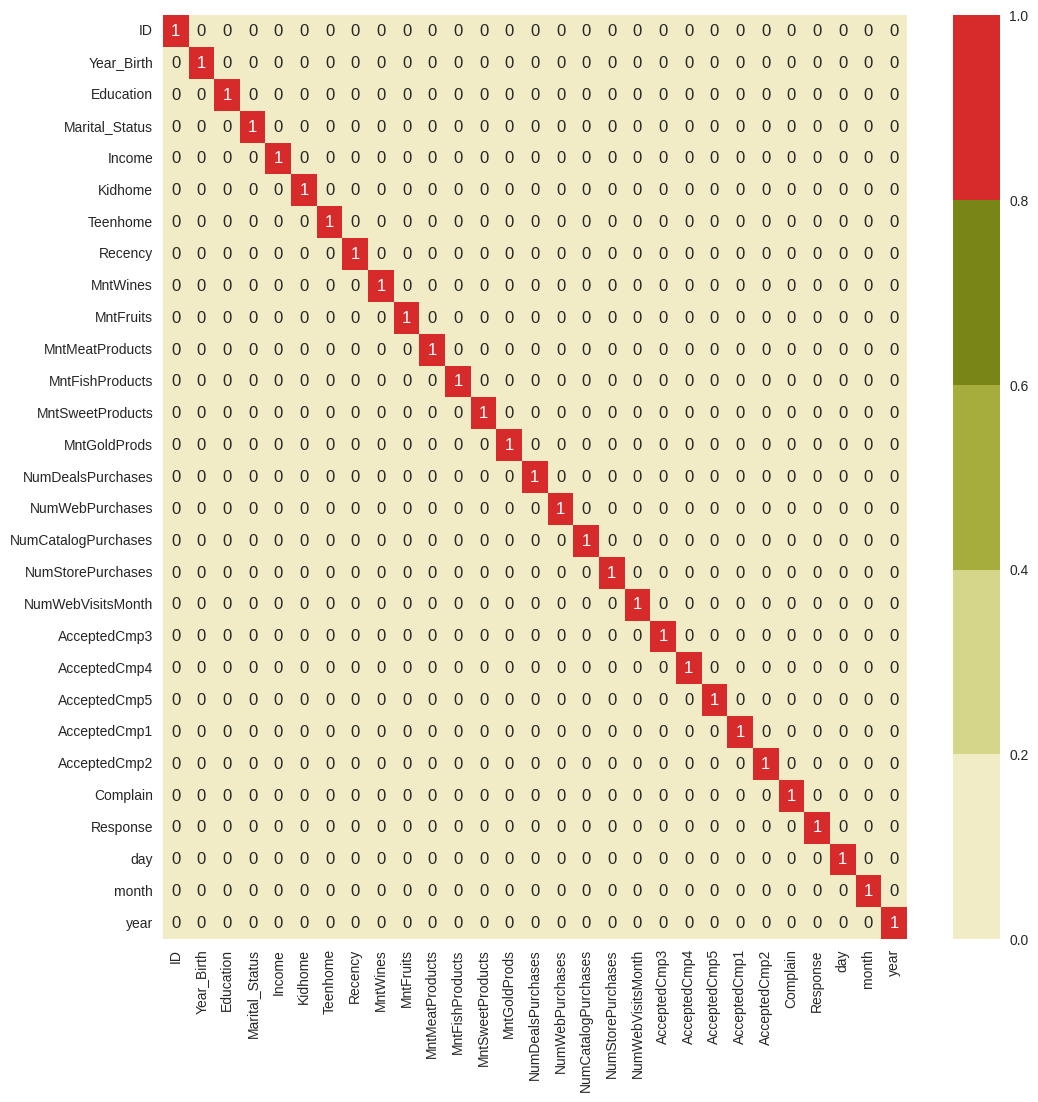

In [13]:
import matplotlib.colors
colors2 = ["#F2ECC6","#D5D68A","#A6AD3C","#798517","#D72A2B"]
cmap = matplotlib.colors.ListedColormap(colors2)
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.8, annot=True, cmap = cmap) 
plt.show()

* **Standardization** is the method of feature scaling which is an integral part of feature engineering. It scales down the data and making it easier for the machine learning model to learn from it. It reduces the mean to ‘0’ and the standard deviation to ‘1’.

In [14]:
#Scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

print("All features are now scaled")

All features are now scaled


## DIMENSIONALITY REDUCTION
* Dimensionality reduction with Principal component analysis (PCA)
* **PCA** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In [15]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2, whiten = True) # whiten = normalize
pca.fit(scaled_df)
PCA_ds = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,8.016051e-17,1.0,-2.008648,-0.901786,-0.26445,0.799065,2.99898
col2,2216.0,2.885778e-17,1.0,-2.563863,-0.753690,-0.14623,0.667080,3.64280


## CLUSTERING


### K - Means Clustering
* Elbow Method

Elbow Method to determine the number of clusters to be formed:


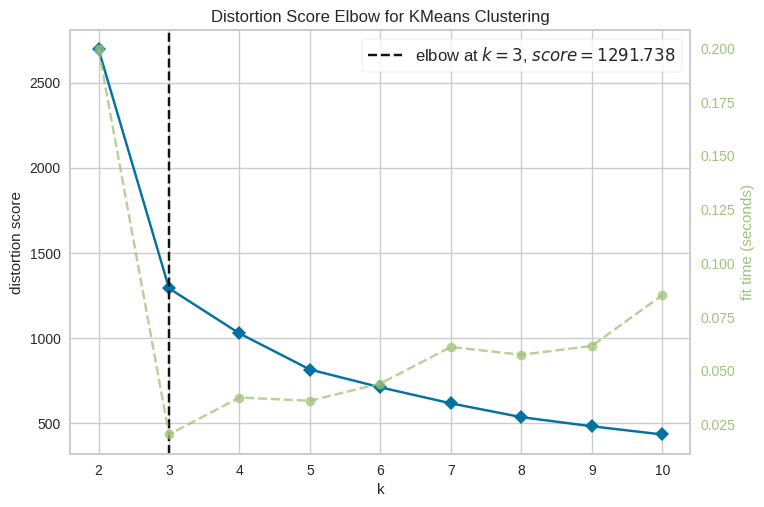

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [17]:
# create clustering model with optimal k=3
model = KMeans(init='k-means++',
               n_clusters=3,
               max_iter=500,
               random_state=22)

segments = model.fit_predict(PCA_ds)

#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= segments

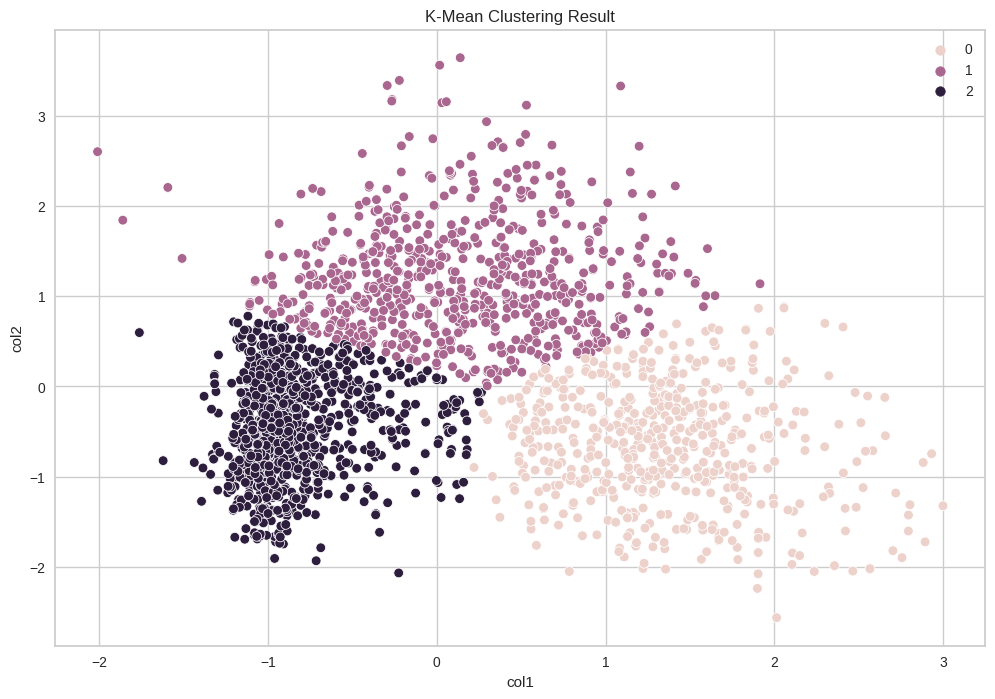

In [18]:
plt.figure(figsize = (12, 8))
pl = sb.scatterplot(data = PCA_ds,x=PCA_ds["col1"], y=PCA_ds["col2"], hue=segments)
pl.set_title("K-Mean Clustering Result")
plt.legend()
plt.show()

###  Hierarchical Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean").fit(PCA_ds)
PCA_ds["Labels"]=AC.labels_


In [22]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(PCA_ds, PCA_ds)
print(dist)

[[0.         2.81199219 1.03224739 ... 1.3721433  0.92598635 2.46961524]
 [2.81199219 0.         1.91305057 ... 1.78928717 1.97766145 2.65431687]
 [1.03224739 1.91305057 0.         ... 0.42498009 0.1649961  2.08284617]
 ...
 [1.3721433  1.78928717 0.42498009 ... 0.         0.5898315  2.31547924]
 [0.92598635 1.97766145 0.1649961  ... 0.5898315  0.         2.0034368 ]
 [2.46961524 2.65431687 2.08284617 ... 2.31547924 2.0034368  0.        ]]


In [23]:
Z = hierarchy.linkage(dist, 'ward')

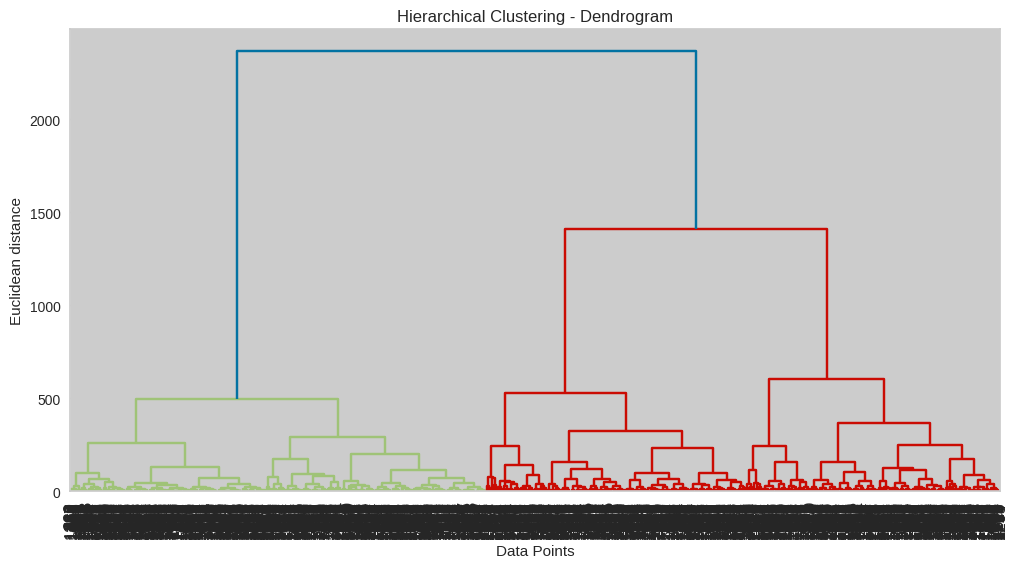

In [24]:
plt.figure(figsize=(12, 6))
dendro = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=12, orientation='top')
plt.xlabel("Data Points")
plt.ylabel("Euclidean distance")
plt.title('Hierarchical Clustering - Dendrogram')
plt.show()

* Alternative easy way to see hierarchical clustering result

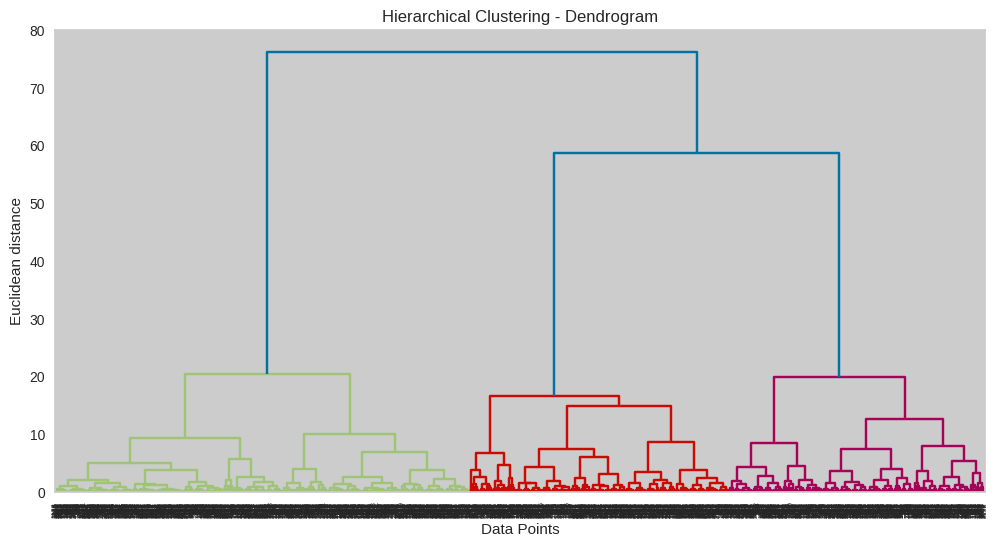

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(PCA_ds, method = "ward") 

plt.figure(figsize = (12, 6))

dendo = dendrogram(merg, leaf_rotation = 90)

plt.xlabel("Data Points")
plt.ylabel("Euclidean distance")
plt.title('Hierarchical Clustering - Dendrogram')
plt.show()

### DBSCAN(Density-Based Spatial Clustering of Applications with Noise)

In [26]:
from sklearn.cluster import DBSCAN

outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=8)
    dbscan.fit(PCA_ds)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

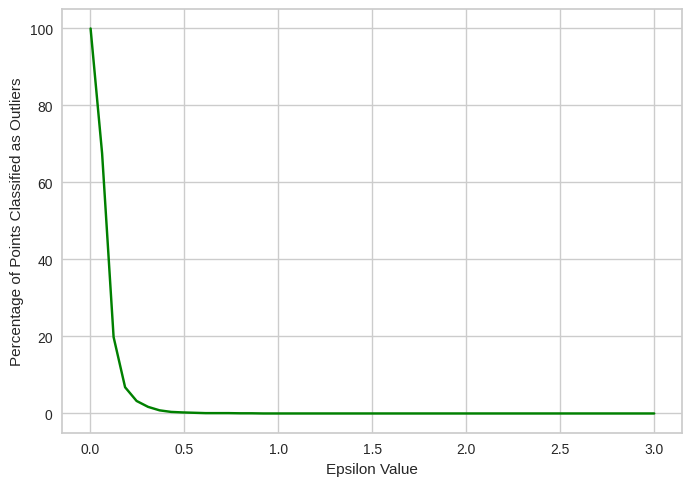

In [27]:
sb.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

* Optimal Epilson(ε) Value : 0.11
* MinPoints (MinPts) Value : 18

In [28]:
dbscan = DBSCAN(eps=0.11,min_samples=18)
dbscan.fit(PCA_ds)
dbscan.labels_

array([-1,  0, -1, ..., -1, -1, -1])

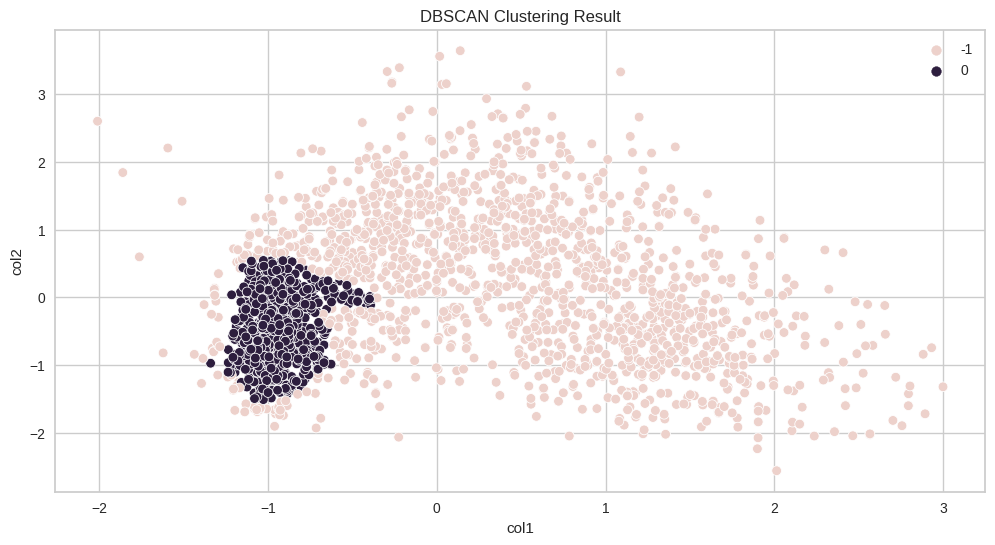

In [29]:
plt.figure(figsize = (12, 6))
s =sb.scatterplot(data = PCA_ds,x=PCA_ds["col1"], y=PCA_ds["col2"], hue = dbscan.labels_)
s.set_title("DBSCAN Clustering Result")
plt.legend()
plt.show()

## CONCLUSION


* The task is to apply different clustering algorithms to the dataset and analyze the results. when looking at the findings of the task as a whole.  First, after passing the data set through the necessary preprocessing steps, the following results were obtained when analyzed in these 3 clustering algorithms;

  - When the visualization results of the 3 clustering algorithms are examined, it is seen that the features in the data set are related to each other.
  - In clustering analysis, it has resulted in the formation of a small number of clusters due to its highly related to features and the effect of dimensionality reduction.


* **The optimum number of clusters** is determined as **3** and and effective results achieved.






### **The Comparison of The Three Clustering Algorithms;**

   - Looking at the 3 clustering algorithms implemented, each can achieve good results on different datasets. In this dataset, K-Means and Hierarchical algorithms performed more successfully than DBSCAN. it is clear that DBSCAN failed to generate reasonable clusters. It is most likely because DBCSAN tries to find clusters based on the density of points. But also the number of clusters can be increased or decreased by modifying the Epsilon (ε) and minPoints (MinPts) values ​​of the DBSCAN clustering algorithm. In turn, K-Means and Hierarchical Clustering Algorithms created reasonable 3 clusters.
  
   - It is seen from the visualization results that K-Means and HC algorithms performed with a successful cluster on this data set.When the visualization results are compared, the visualization of the HC algorithm with the dendrogram gives us the result that there are actually many more clusters under 3 clusters. 
   - And finally,  when the working principle of the two is examined, it is observed that hierarchical clustering can produce better results in terms of clustering without being dependent on a fixed value(k).

 


### **The Identified Customer Segments;**






 * Since this is an unsupervised clustering. I do not have a tagged feature to evaluate or score our models. For that, I will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

 * Firstly, let me have a look at the group distribution of clustring




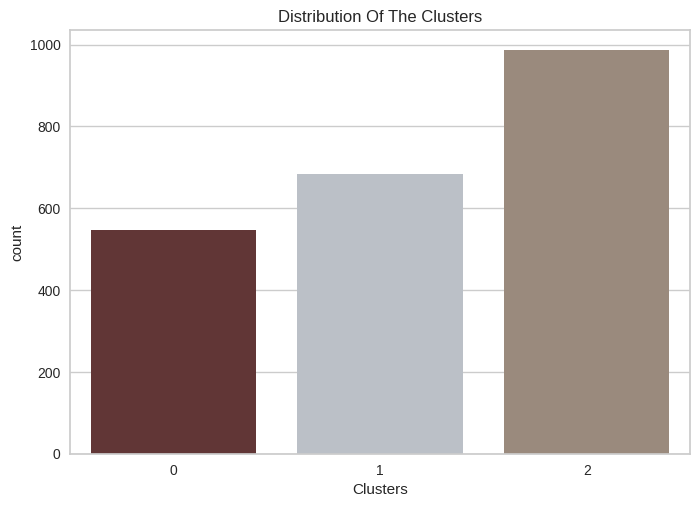

In [30]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78"]
pl = sb.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

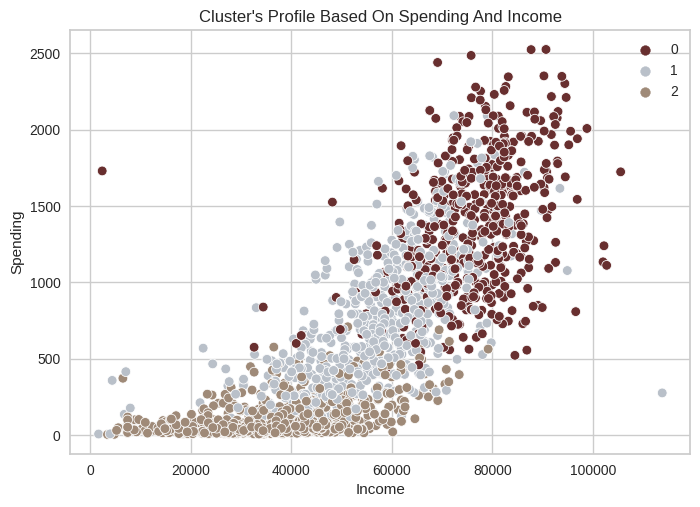

In [32]:
df['Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'] 
df = df[df.Income < 140000]

pl = sb.scatterplot(data = df,x=df["Income"], y=df["Spending"], hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Spending And Income")
plt.legend()
plt.show()

* Income vs spending plot shows the clusters pattern

   - group 0: high spending & high  income
   - group 1: average  spending & average income
   - group 2: low spending & average and low income

Text(0.5, 1.0, 'Cluster wise Spendings')

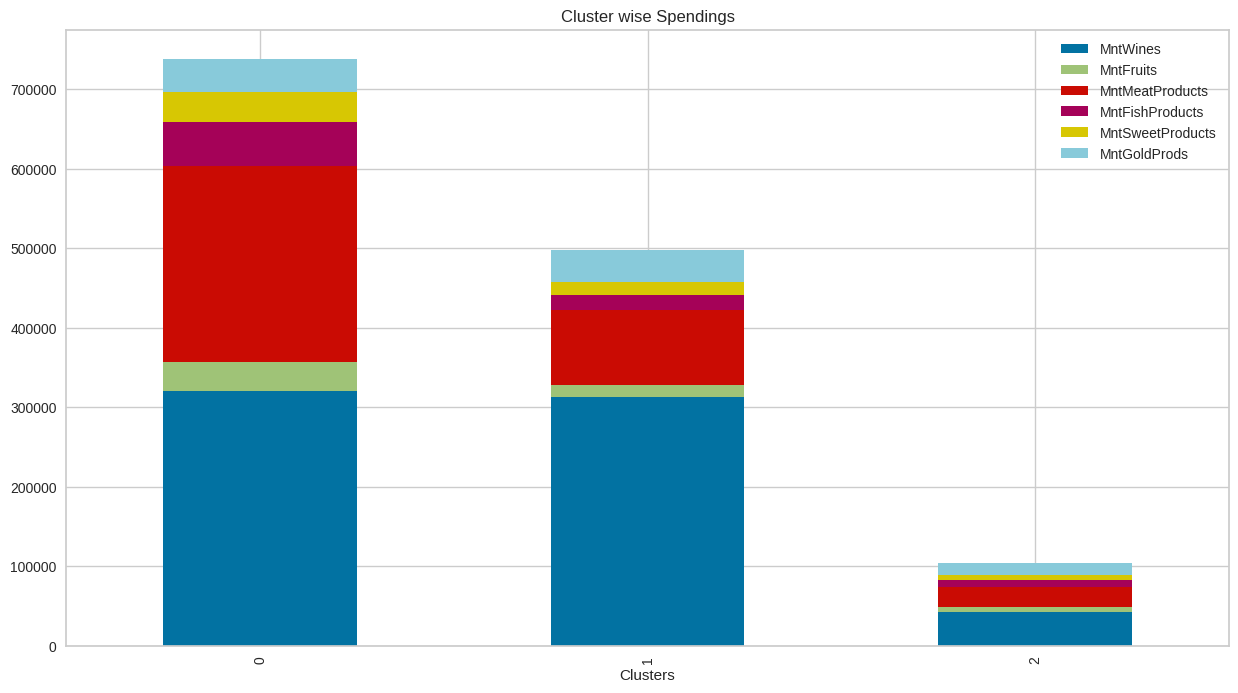

In [33]:
cluster_spendings = df.groupby('Clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

cluster_spendings.plot(kind='bar', stacked=True,figsize=(15,8))
plt.title('Cluster wise Spendings')

* From the above plot, it can be clearly seen that cluster 0 is our biggest set of customers closely followed by cluster 1. We can explore what each cluster is spending on for 

Text(0.5, 1.0, 'Cluster wise Marketing Results')

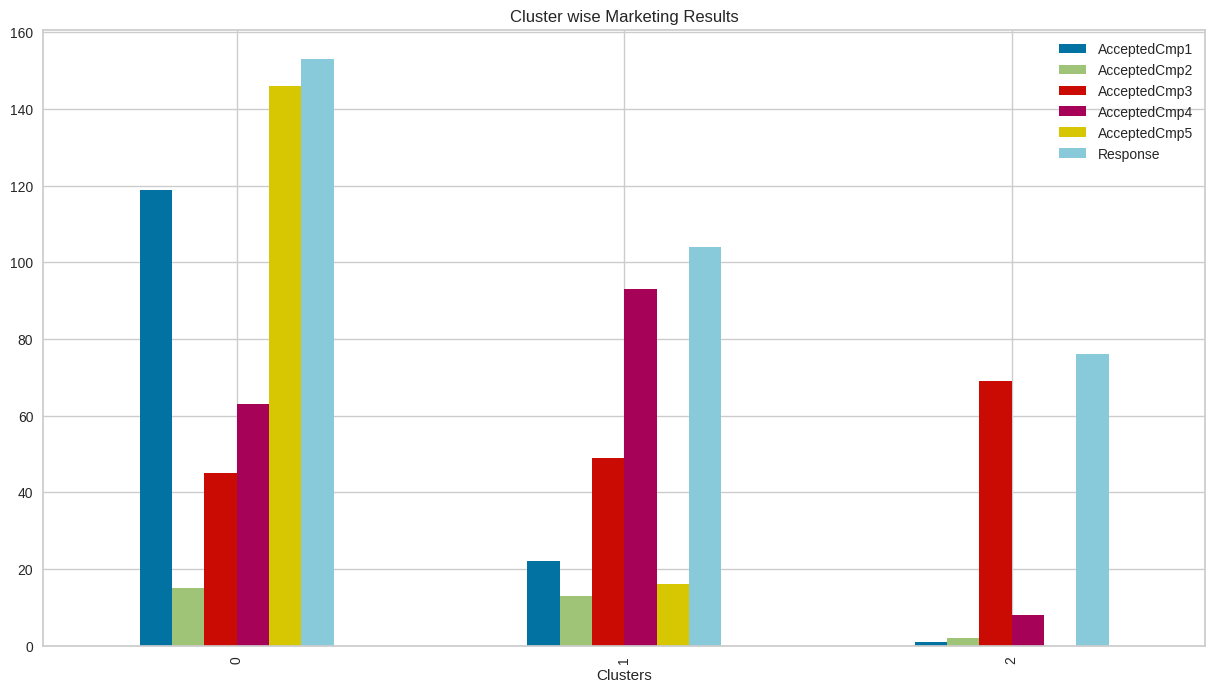

In [34]:
cluster_campaign = df.groupby('Clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()

cluster_campaign.plot(kind='bar', figsize=(15,8))
plt.title('Cluster wise Marketing Results')

* It is seen that there is a general interest in campaigns in 0 clusters.

Text(0.5, 1.0, 'Cluster wise Purchasing Habits')

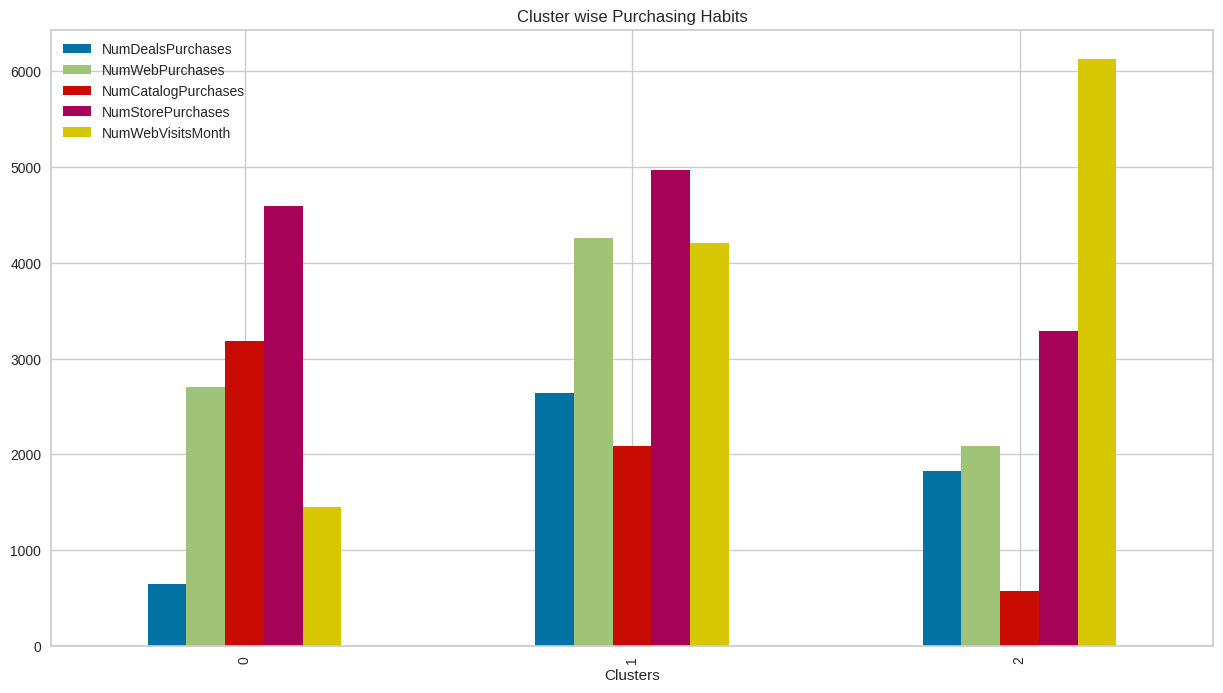

In [35]:
cluster_purchases = df.groupby('Clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

cluster_purchases.plot(kind='bar', figsize=(15,8))
plt.title('Cluster wise Purchasing Habits')

* Purchasing propensity is observed in customers in each cluster

* In this project, I performed unsupervised clustering. I did use dimensionality reduction followed by K- Means , HC, DBSCAN  algorithms. And then I performed the optimal number of clusters, the identified customer segment and the comparison of the three clustering algorithms.